In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
import sys
import pandas as pd
import matplotlib
import numpy as np
import scipy as sp
import IPython
import sklearn
import mglearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from IPython.display import display
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [9]:
from sklearn.metrics import f1_score
from sklearn.dummy import DummyClassifier
from sklearn.datasets import load_digits
digits=load_digits()
y=digits.target==9
from sklearn.tree import DecisionTreeClassifier
X_train,X_test,y_train,y_test=train_test_split(digits.data,y,random_state=0)
tree=DecisionTreeClassifier(max_depth=2).fit(X_train,y_train)
pred_tree=tree.predict(X_test)
dummy_majority=DummyClassifier(strategy='most_frequent').fit(X_train,y_train)
pred_most_frequent=dummy_majority.predict(X_test)
dummy=DummyClassifier().fit(X_train,y_train)
pred_dummy=dummy.predict(X_test)
logreg=LogisticRegression(C=0.1).fit(X_train,y_train)
pred_logreg=logreg.predict(X_test)
print("f1 score most frequent:{:.2f}".format(f1_score(y_test,pred_most_frequent)))
print("f1 score dummy:{:.2f}".format(f1_score(y_test,pred_dummy)))
print("f1 score tree:{:.2f}".format(f1_score(y_test,pred_tree)))
print("f1 score logistic regression:{:.2f}".format(f1_score(y_test,pred_logreg)))

f1 score most frequent:0.00
f1 score dummy:0.15
f1 score tree:0.55
f1 score logistic regression:0.89


In [10]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_most_frequent,target_names=["not nine","nine"]))

              precision    recall  f1-score   support

    not nine       0.90      1.00      0.94       403
        nine       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



In [11]:
print(classification_report(y_test,pred_dummy,target_names=["not nine","nine"]))

              precision    recall  f1-score   support

    not nine       0.90      0.90      0.90       403
        nine       0.15      0.15      0.15        47

    accuracy                           0.82       450
   macro avg       0.53      0.53      0.53       450
weighted avg       0.82      0.82      0.82       450



In [12]:
print(classification_report(y_test,pred_logreg,target_names=["not nine","nine"]))

              precision    recall  f1-score   support

    not nine       0.98      1.00      0.99       403
        nine       0.95      0.83      0.89        47

    accuracy                           0.98       450
   macro avg       0.97      0.91      0.94       450
weighted avg       0.98      0.98      0.98       450



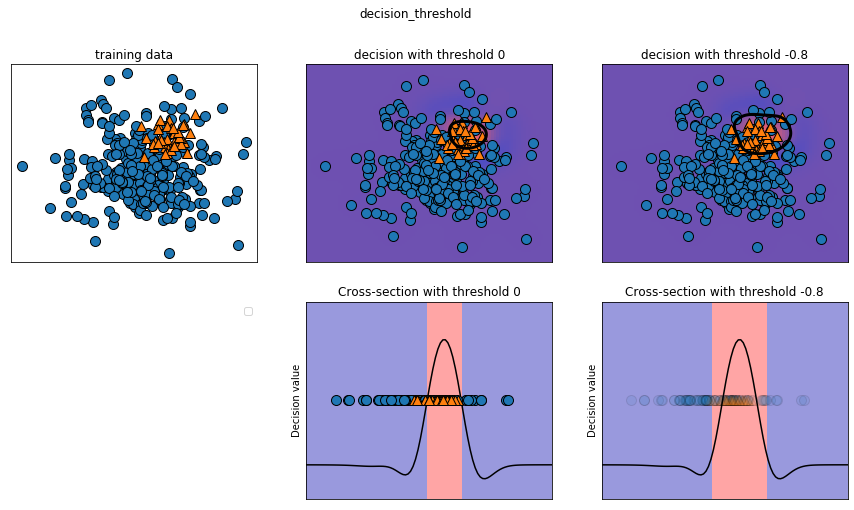

In [15]:
from sklearn.svm import SVC
from mglearn.datasets import make_blobs
X,y=make_blobs(n_samples=(400,50),centers=2,cluster_std=[7.0,2],random_state=22)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
svc=SVC(gamma=.05).fit(X_train,y_train)
mglearn.plots.plot_decision_threshold()

In [17]:
print(classification_report(y_test,svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       104
           1       0.35      0.67      0.46         9

    accuracy                           0.88       113
   macro avg       0.66      0.78      0.70       113
weighted avg       0.92      0.88      0.89       113



In [ ]:
#假设类别1有高召回率更重要，意味着愿意有更多的假正例，（预测癌症）来换取更多真正例，默认情况下decision_function大于0的点为类别1

In [18]:
y_pred_lower_threshold=svc.decision_function(X_test)>-.8

In [19]:
print(classification_report(y_test,y_pred_lower_threshold))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90       104
           1       0.32      1.00      0.49         9

    accuracy                           0.83       113
   macro avg       0.66      0.91      0.69       113
weighted avg       0.95      0.83      0.87       113



In [ ]:
#只能在训练集上这么做，可使用验证集或交叉验证代替
#校准：校准模型是指能够为其不确定性提供精确的模型
#难点在于满足阈值的同时仍具有合理的准确率，分类器设置通常称为工作点

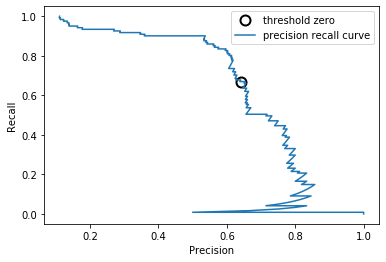

In [26]:
from sklearn.metrics import precision_recall_curve
precision,recall,thresholds=precision_recall_curve(y_test,svc.decision_function(X_test))

#使用更多的数据点得到更加平滑的曲线
X,y=make_blobs(n_samples=(4000,500),centers=2,cluster_std=[7.0,2],random_state=22)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
svc=SVC(gamma=.05).fit(X_train,y_train)
precision,recall,thresholds=precision_recall_curve(y_test,svc.decision_function(X_test))
#找到最接近0的阈值
close_zero=np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero],recall[close_zero],'o',markersize=10,label="threshold zero",fillstyle="none",c='k',mew=2)

plt.plot(precision,recall,label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

In [ ]:
#分类器越靠近右上角越好，随着准确率的升高，模型越能保持较高的召回率，则模型越好
#不同的分类器可能在曲线上不同的位置表现很好
#随机森林，二分类的predict_proba默认阈值0.5
#比较svm与随机森林

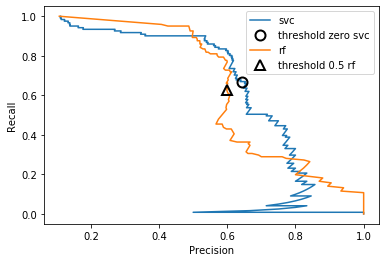

In [25]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=100,random_state=0,max_features=2)
rf.fit(X_train,y_train)

#randomforest有predict_proba但没有decision_function
precision_rf,recall_rf,thresholds_rf=precision_recall_curve(y_test,rf.predict_proba(X_test)[:,1])

plt.plot(precision,recall,label="svc")
plt.plot(precision[close_zero],recall[close_zero],'o',markersize=10,label="threshold zero svc",fillstyle="none",c='k',mew=2)

plt.plot(precision_rf,recall_rf,label="rf")

close_default_rf=np.argmin(np.abs(thresholds_rf-0.5))
plt.plot(precision_rf[close_default_rf],recall_rf[close_default_rf],'^',c='k',markersize=10,label="threshold 0.5 rf",fillstyle="none",mew=2)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

In [27]:
#随机森林在极值处表现更好，在中间位置svm表现更好
print("f1score of randomforest:{:.3f}".format(f1_score(y_test,rf.predict(X_test))))
print("f1score of svc:{:.3f}".format(f1_score(y_test,svc.predict(X_test))))

f1score of randomforest:0.610
f1score of svc:0.656


In [ ]:
#总结曲线的一种方法是计算该曲线下积分或面积，平均准确率

In [28]:
from sklearn.metrics import average_precision_score
ap_rf=average_precision_score(y_test,rf.predict_proba(X_test)[:,1])
ap_svc=average_precision_score(y_test,svc.decision_function(X_test))
print("Average precision of random forest:{:.3f}".format(ap_rf))
print("Average precision of svc:{:.3f}".format(ap_svc))

Average precision of random forest:0.660
Average precision of svc:0.666


In [ ]:
#受试者工作特征曲线roc曲线，显示的是假正例率和真正例率
#fpr=fp/(fp+tn)
#利用roc_curve函数计算

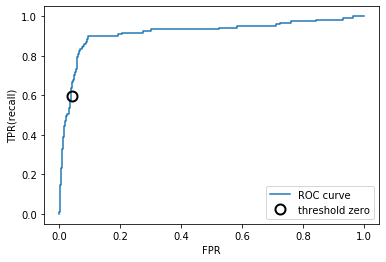

In [29]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y_test,svc.decision_function(X_test))

plt.plot(fpr,tpr,label="ROC curve")
plt.xlabel("FPR")
plt.ylabel("TPR(recall)")
#找到最接近0的阈值
close_zero=np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero],tpr[close_default_rf],'o',c='k',markersize=10,label="threshold zero",fillstyle="none",mew=2)
plt.legend(loc=4)

#svm的roc曲线

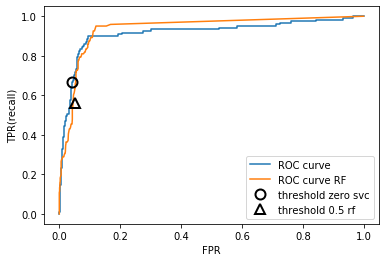

In [32]:
#roc曲线要靠近左上角，召回率高，同时假正例率很低，不应在测试集上选择阈值，而应该在单独的验证集上进行选择
fpr_rf,tpr_rf,thresholds_rf=roc_curve(y_test,rf.predict_proba(X_test)[:,1])


plt.plot(fpr,tpr,label="ROC curve")
plt.plot(fpr_rf,tpr_rf,label="ROC curve RF")

plt.plot(fpr[close_zero],tpr[close_zero],'o',c='k',markersize=10,label="threshold zero svc",fillstyle="none",mew=2)

close_default_rf=np.argmin(np.abs(thresholds_rf-0.5))
plt.plot(fpr_rf[close_default_rf],tpr[close_default_rf],'^',c='k',markersize=10,label="threshold 0.5 rf",fillstyle="none",mew=2)

plt.xlabel("FPR")
plt.ylabel("TPR(recall)")
plt.legend(loc=4)

In [33]:
#roc曲线下面积为auc，利用roc_auc_score计算
from sklearn.metrics import roc_auc_score
rf_auc=roc_auc_score(y_test,rf.predict_proba(X_test)[:,1])
svc_auc=roc_auc_score(y_test,svc.decision_function(X_test))
print("AUC of random forest:{:.3f}".format(rf_auc))
print("AUC of svc:{:.3f}".format(svc_auc))

AUC of random forest:0.937
AUC of svc:0.916


In [ ]:
#对不平衡分类问题，auc比精度好得多
#可被解释为评估正例样本的排名，等价于从正类样本中随机挑选一个点，有分类器给出分数比从反类样本中随机挑选一个点的分数更高的概率

gamma=1.00  accuracy=0.90  AUC=0.50
gamma=0.05  accuracy=0.90  AUC=1.00
gamma=0.01  accuracy=0.90  AUC=1.00


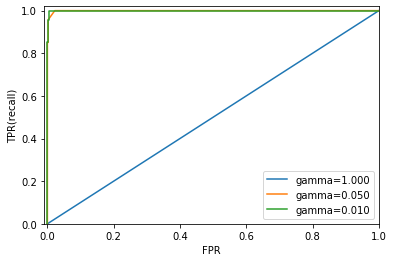

In [34]:
y=digits.target==9
X_train,X_test,y_train,y_test=train_test_split(digits.data,y,random_state=0)
plt.figure()

for gamma in [1,0.05,0.01]:
    svc=SVC(gamma=gamma).fit(X_train,y_train)
    accuracy=svc.score(X_test,y_test)
    auc=roc_auc_score(y_test,svc.decision_function(X_test))
    fpr,tpr,_=roc_curve(y_test,svc.decision_function(X_test))
    print("gamma={:.2f}  accuracy={:.2f}  AUC={:.2f}".format(gamma,accuracy,auc))
    plt.plot(fpr,tpr,label="gamma={:.3f}".format(gamma))
plt.xlabel("FPR")
plt.ylabel("TPR(recall)")
plt.xlim(-0.01,1)
plt.ylim(0,1.02)
plt.legend(loc="best")

In [ ]:
#精度相同都等于0.9，gamma=1时auc处于随机水平，decision_function输出与随机结果一样好
#0.05接近完美，0.01时得到1.0完美auc，意味着利用正确的阈值，模型可以进行完美分类，auc没有使用默认阈值，可能需调节决策阈值